In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Chapter2

## 用户行为分析

### 用户活跃度和物品流行度的分布

In [2]:
from util.movielen_reader import read_rating_data
from util import movielen_reader

movieLen_data = read_rating_data()
movieLen_df = pd.DataFrame(movieLen_data,columns = ["userID","movieID","Rating"])
movieLen_df.head()

userID  movieID  Rating
0       1     1193       5
1       1      661       3
2       1      914       3
3       1     3408       4
4       1     2355       5

In [62]:
sum_movie_rating = (
    movieLen_df[["userID","movieID"]].groupby(["movieID"],as_index = False).count())
sum_movie_rating.rename(
                mapper = {"userID" : "Item Popularity"},
                axis = 1,
                inplace = True
)
sum_movie_rating = sum_movie_rating.groupby("Item Popularity",as_index = False).count()
sum_movie_rating.rename(
                mapper = {"movieID" : "counts"},
                axis = 1,
                inplace = True
)
sum_movie_rating["log_Item_Popularity"] = np.log10(sum_movie_rating["Item Popularity"])
sum_movie_rating.head()

Item Popularity  counts  log_Item_Popularity
0                1     114             0.000000
1                2      89             0.301030
2                3      42             0.477121
3                4      45             0.602060
4                5      39             0.698970

/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


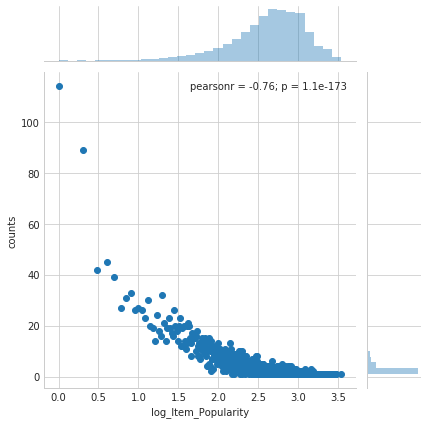

In [68]:
import seaborn as sns

sns.set_style("whitegrid")
axe = sns.jointplot(x = "log_Item_Popularity",y = "counts",data = sum_movie_rating)


/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'')

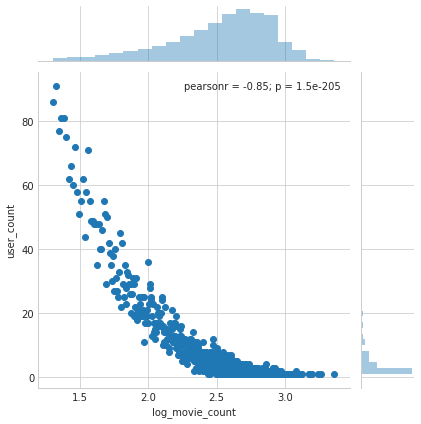

In [21]:
import seaborn as sns

item_popularity = movieLen_df.groupby(["userID"],as_index = False).count()
item_popularity.rename(mapper = {"movieID" : "movie_count"},axis = 1,inplace = True)
item_popularity = item_popularity.groupby(["movie_count"],as_index = False).count()
item_popularity.rename(mapper = {"userID" : "user_count"},axis = 1,inplace = True)
item_popularity["log_movie_count"] = np.log10(item_popularity.movie_count)

sns.set_style("whitegrid")

sns.jointplot(data = item_popularity,x = "log_movie_count",y = "user_count")
plt.title("")

### 用户活跃度和物品流行度的关系

/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


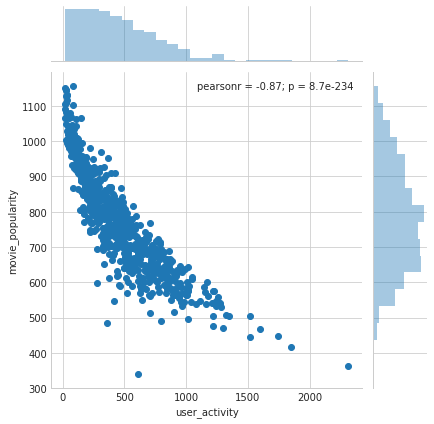

In [4]:
import seaborn as sns

user_activity = movieLen_df[["userID","movieID"]].groupby("userID").count()
user_activity.rename({"movieID" : "user_activity"},axis = 1,inplace = True)

movie_popularity = (movieLen_df[["userID","movieID"]].
                                groupby("movieID",as_index = False).count())
movie_popularity.rename({"userID" : "movie_popularity"},axis = 1,inplace = True)


combine = pd.merge(left = movieLen_df,right = user_activity,on = "userID")
combine = pd.merge(left = combine,right = movie_popularity,on = "movieID")

combine = combine.groupby(["user_activity"],as_index = False).mean()

sns.set_style("whitegrid")
sns.jointplot(data = combine,x = "user_activity",y = "movie_popularity")

## 基于邻域方法